In [1]:
#standard libraries
import pandas as pd
import numpy as np

#visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import export_graphviz
import pydot
from sklearn import tree
import plotly.express as px

#machine learning
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn import preprocessing
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, RepeatedKFold, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, accuracy_score, recall_score, f1_score, roc_auc_score, log_loss
from sklearn.decomposition import PCA

import plotly.offline as offline
import plotly.graph_objs as go

offline.init_notebook_mode()

sns.set(style='whitegrid', color_codes=True, font_scale=1.3)
%matplotlib inline

In [2]:
df = pd.read_csv("C:/Users/eepag/Downloads/archive (2)/heart.csv")

In [3]:
df.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [4]:
df.tail()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
916    174              N      0.0     Flat             1  
917    173              N      0.0       Up             0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
df.describe().T

count        mean         std   min     25%    50%    75%    max
Age           918.0   53.510893    9.432617  28.0   47.00   54.0   60.0   77.0
RestingBP     918.0  132.396514   18.514154   0.0  120.00  130.0  140.0  200.0
Cholesterol   918.0  198.799564  109.384145   0.0  173.25  223.0  267.0  603.0
FastingBS     918.0    0.233115    0.423046   0.0    0.00    0.0    0.0    1.0
MaxHR         918.0  136.809368   25.460334  60.0  120.00  138.0  156.0  202.0
Oldpeak       918.0    0.887364    1.066570  -2.6    0.00    0.6    1.5    6.2
HeartDisease  918.0    0.553377    0.497414   0.0    0.00    1.0    1.0    1.0

In [8]:
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

<Axes: xlabel='HeartDisease', ylabel='count'>

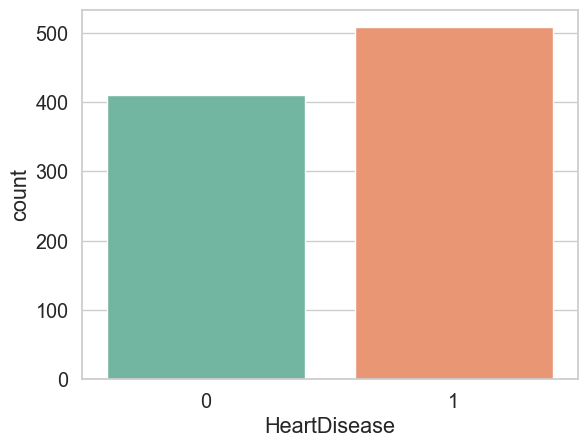

In [9]:
sns.countplot(data=df, x='HeartDisease', palette='Set2')

Data is well balanced with no missing values

I want to explore the data to see if there are any variables that stand out, such as sex, age, cholesterol levels, etc.

In the following cell, I am creating a new variable of sex and heart disease, and resetting the index so my y axis shows the total number of patients

<Axes: xlabel='Sex', ylabel='Total'>

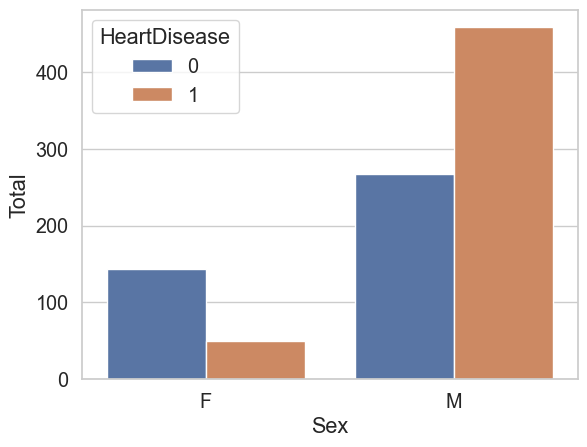

In [10]:
sex_heart = df.groupby(['Sex', 'HeartDisease'])['Sex'].count().reset_index(name='Total')
sns.barplot(data=sex_heart, x='Sex', y='Total', hue='HeartDisease')

We can observe that there is a larger population of men in the study and men have more instances of heart disease than women.

Text(0.5, 1.0, 'Total People by Chest Pain Type and Heart Disease')

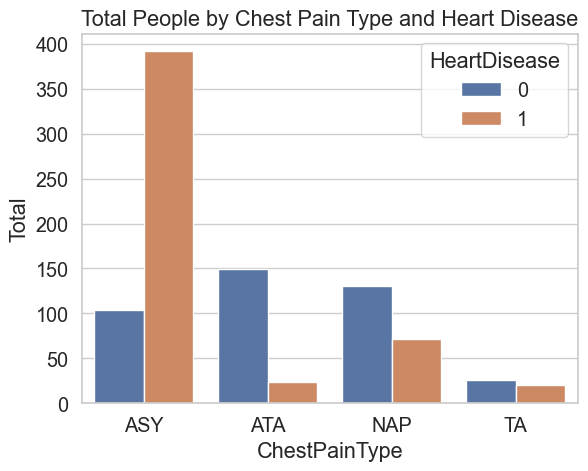

In [11]:
chestpain_heart = df.groupby(['ChestPainType', 'HeartDisease'])['ChestPainType'].count().reset_index(name='Total')
sns.barplot(data = chestpain_heart, x='ChestPainType', y='Total', hue='HeartDisease')
plt.title('Total People by Chest Pain Type and Heart Disease')

ASY chest pain is highly observed in instances of heart disease.

In [12]:
px.histogram(data_frame=df, x='Age', color='HeartDisease', nbins=30).update_layout(title='Age Distribution')

In [13]:
X = df.drop(columns=['HeartDisease'], axis=1)
y = df['HeartDisease']

Age range 50-60 has high occurrences of heart disease

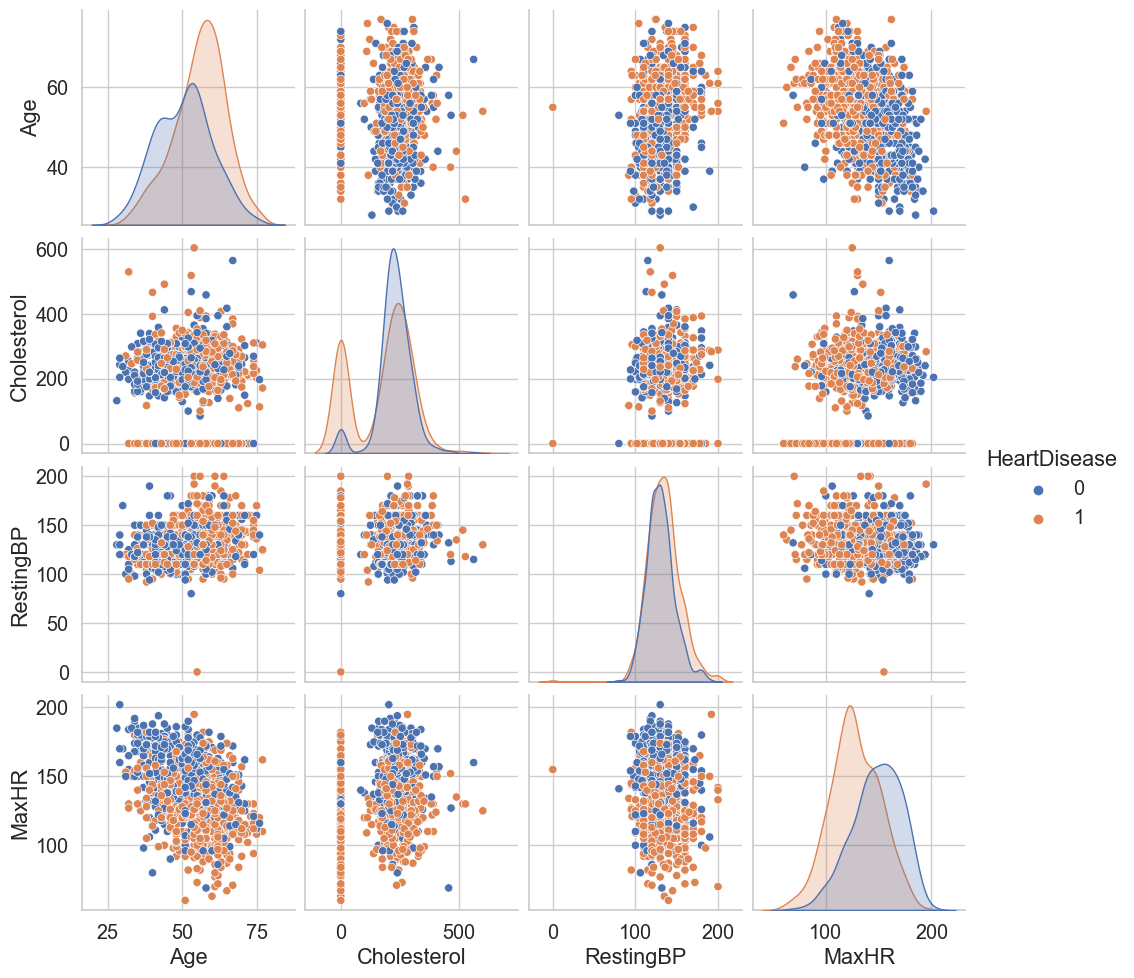

In [14]:
sns.pairplot(df, hue = 'HeartDisease', vars = ['Age', 'Cholesterol', 'RestingBP', 'MaxHR'])

Heatmap of numeric variables

In [15]:
X.corr()

C:\Users\eepag\AppData\Local\Temp\ipykernel_1384\1968499000.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak
Age          1.000000   0.254399    -0.095282   0.198039 -0.382045  0.258612
RestingBP    0.254399   1.000000     0.100893   0.070193 -0.112135  0.164803
Cholesterol -0.095282   0.100893     1.000000  -0.260974  0.235792  0.050148
FastingBS    0.198039   0.070193    -0.260974   1.000000 -0.131438  0.052698
MaxHR       -0.382045  -0.112135     0.235792  -0.131438  1.000000 -0.160691
Oldpeak      0.258612   0.164803     0.050148   0.052698 -0.160691  1.000000

C:\Users\eepag\AppData\Local\Temp\ipykernel_1384\2860968708.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



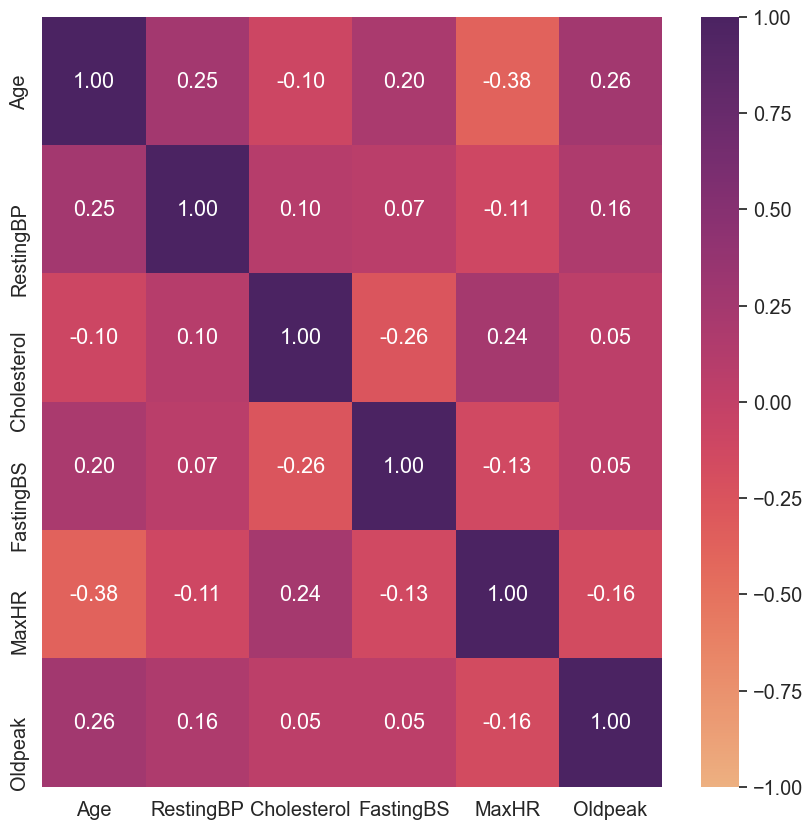

In [16]:
plt.figure(figsize=(10,10))
corr = X.corr()
cmap = sns.color_palette('flare', as_cmap=True)
sns.heatmap(corr, annot=True, cmap=cmap, vmin=-1, vmax=1, center=0, fmt='.2f')
plt.show()

In [17]:
ct = ColumnTransformer(transformers=[('encode', OneHotEncoder(drop='first'), [1, 2, 6, 8, 10])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

Splitting the data

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

scaling data

numeric_features = [0, 3, 4, 5, 7, 9]
numeric_transformer = StandardScaler()

preprocessor=ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])
    
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [19]:
sc = StandardScaler()
minmax = MinMaxScaler()

In [20]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[ 0.54494926, -0.48926704, -0.52085231, ..., -0.52568236,
         0.77460871, -0.7294597 ],
       [ 0.54494926, -0.48926704, -0.52085231, ...,  1.90228942,
        -1.17367255,  0.99028313],
       [ 0.54494926, -0.48926704,  1.91993005, ...,  1.90228942,
        -0.60542385, -0.81997248],
       ...,
       [ 0.54494926, -0.48926704, -0.52085231, ..., -0.52568236,
         0.28753839,  0.44720645],
       [ 0.54494926, -0.48926704, -0.52085231, ..., -0.52568236,
        -0.76778062, -0.81997248],
       [-1.83503323, -0.48926704, -0.52085231, ..., -0.52568236,
        -0.28071031,  0.99028313]])

In [21]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [22]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [23]:
y_pred = knn.predict(X_test)
print("Test set prediction: {}".format(y_pred))

Test set prediction: [0 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 1
 0 1 1 1 1 1 0 0 1 1 1 1 0 0 0 1 1 0 0 0 1 1 1 0 0 0 1 0 1 1 1 1 1 0 0 1 0
 0 1 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 1 1 0 0 1 0 1 1 0 1
 1 0 0 1 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1 1 0
 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0
 0 1 0 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 1 1 0 0 0 1 1 1 1 1 0 0 0 1
 1 0 1 0 1 1 0 0 1 1 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1
 1 0 1 0 0 1 0 1 1 1 1 0 1 0 1 1 0]


In [24]:
knn.score(X_test, y_test)

0.8695652173913043

In [25]:
cv_results = cross_val_score(knn, X, y, cv=6)
print(cv_results)

[0.64705882 0.79738562 0.75816993 0.65359477 0.65359477 0.60130719]


In [26]:
print("the average accuracy rate is: {}".format(np.mean(cv_results)))

the average accuracy rate is: 0.6851851851851851


On cross validation, this model did not perform as well as the initial score. Will now do hyperparameter tuning.

In [27]:
param_grid = {"n_neighbors":np.arange(1, 50)}
knn = KNeighborsClassifier()
knn_best = GridSearchCV(knn, param_grid, cv=6)
knn_best.fit(X, y)

GridSearchCV(cv=6, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [28]:
knn_best.best_params_
print("best parameter:", knn_best.best_params_)

best parameter: {'n_neighbors': 28}


In [29]:
knn_best.best_score_
print("best score:", knn_best.best_score_)

best score: 0.7102396514161221


In [30]:
y_pred = knn_best.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       112
           1       0.59      1.00      0.75       164

    accuracy                           0.59       276
   macro avg       0.30      0.50      0.37       276
weighted avg       0.35      0.59      0.44       276



C:\Users\eepag\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\eepag\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\eepag\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Re-running KNN model with updated neighbors

In [31]:
knn = KNeighborsClassifier(n_neighbors = 29)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[101  11]
 [ 18 146]]


Confusion Matrix:
 [[101  11]
 [ 18 146]] 

True Positive: 146
False Positive: 11
True Negative: 101
False Negative: 18
Correct predictions: 89.5 %


<Axes: >

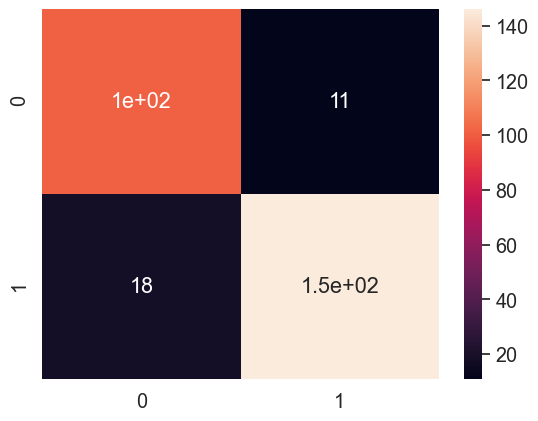

In [32]:
cm=confusion_matrix(y_test,y_pred)
true_positive=cm[1][1]
false_positive=cm[0][1]
true_negative=cm[0][0]
false_negative=cm[1][0]
print("Confusion Matrix:\n", cm, "\n")
print("True Positive:",true_positive )
print("False Positive:",false_positive )
print("True Negative:",true_negative )
print("False Negative:",false_negative )
print("Correct predictions:",round((true_positive + 
true_negative)/len(y_pred)*100,1),'%' )
#print(cm)
sns.heatmap(cm, annot=True)

n_neighbors = 29 resulted in significantly improved model performance.
Observations - 

KNN can be prone to overfitting due to curse of dimensionality. Higher k values smooth out. 
Curse of dimensionality can be avoided by using dimension reduction

# PCA Analysis

Now I have an idea of what is happening with the model and its performance, I want to see if reducing the dimensions further improves the model.
To show process, I am doing the PCA Analysis and will run the knn again after.

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [34]:
preprocessor = ColumnTransformer(
    transformers=[
        ('encode', OneHotEncoder(drop='first'), [1, 2, 6, 8, 10])
    ],
    remainder = 'passthrough')

In [35]:
df_encoded = preprocessor.fit_transform(df)

In [36]:
column_names = preprocessor.get_feature_names_out()
df_encoded = pd.DataFrame(df_encoded, columns = column_names)

In [37]:
df_encoded.head()

encode__Sex_M  encode__ChestPainType_ATA  encode__ChestPainType_NAP  \
0            1.0                        1.0                        0.0   
1            0.0                        0.0                        1.0   
2            1.0                        1.0                        0.0   
3            0.0                        0.0                        0.0   
4            1.0                        0.0                        1.0   

   encode__ChestPainType_TA  encode__RestingECG_Normal  encode__RestingECG_ST  \
0                       0.0                        1.0                    0.0   
1                       0.0                        1.0                    0.0   
2                       0.0                        0.0                    1.0   
3                       0.0                        1.0                    0.0   
4                       0.0                        1.0                    0.0   

   encode__ExerciseAngina_Y  encode__ST_Slope_Flat  encode__ST_Slope_Up  \
0                       0.0                    0.0                  1.0   
1                       0.0                    1.0                  0.0   
2                       0.0                    0.0                  1.0   
3                       1.0                    1.0                  0.0   
4                       0.0                    0.0                  1.0   

   remainder__Age  remainder__RestingBP  remainder__Cholesterol  \
0            40.0                 140.0                   289.0   
1            49.0                 160.0                   180.0   
2            37.0                 130.0                   283.0   
3            48.0                 138.0                   214.0   
4            54.0                 150.0                   195.0   

   remainder__FastingBS  remainder__MaxHR  remainder__Oldpeak  \
0                   0.0             172.0                 0.0   
1                   0.0             156.0                 1.0   
2                   0.0              98.0                 0.0   
3                   0.0             108.0                 1.5   
4                   0.0             122.0                 0.0   

   remainder__HeartDisease  
0                      0.0  
1                      1.0  
2                      0.0  
3                      1.0  
4                      0.0

In [38]:
df_encoded.tail()

encode__Sex_M  encode__ChestPainType_ATA  encode__ChestPainType_NAP  \
913            1.0                        0.0                        0.0   
914            1.0                        0.0                        0.0   
915            1.0                        0.0                        0.0   
916            0.0                        1.0                        0.0   
917            1.0                        0.0                        1.0   

     encode__ChestPainType_TA  encode__RestingECG_Normal  \
913                       1.0                        1.0   
914                       0.0                        1.0   
915                       0.0                        1.0   
916                       0.0                        0.0   
917                       0.0                        1.0   

     encode__RestingECG_ST  encode__ExerciseAngina_Y  encode__ST_Slope_Flat  \
913                    0.0                       0.0                    1.0   
914                    0.0                       0.0                    1.0   
915                    0.0                       1.0                    1.0   
916                    0.0                       0.0                    1.0   
917                    0.0                       0.0                    0.0   

     encode__ST_Slope_Up  remainder__Age  remainder__RestingBP  \
913                  0.0            45.0                 110.0   
914                  0.0            68.0                 144.0   
915                  0.0            57.0                 130.0   
916                  0.0            57.0                 130.0   
917                  1.0            38.0                 138.0   

     remainder__Cholesterol  remainder__FastingBS  remainder__MaxHR  \
913                   264.0                   0.0             132.0   
914                   193.0                   1.0             141.0   
915                   131.0                   0.0             115.0   
916                   236.0                   0.0             174.0   
917                   175.0                   0.0             173.0   

     remainder__Oldpeak  remainder__HeartDisease  
913                 1.2                      1.0  
914                 3.4                      1.0  
915                 1.2                      1.0  
916                 0.0                      1.0  
917                 0.0                      0.0

In [39]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   encode__Sex_M              918 non-null    float64
 1   encode__ChestPainType_ATA  918 non-null    float64
 2   encode__ChestPainType_NAP  918 non-null    float64
 3   encode__ChestPainType_TA   918 non-null    float64
 4   encode__RestingECG_Normal  918 non-null    float64
 5   encode__RestingECG_ST      918 non-null    float64
 6   encode__ExerciseAngina_Y   918 non-null    float64
 7   encode__ST_Slope_Flat      918 non-null    float64
 8   encode__ST_Slope_Up        918 non-null    float64
 9   remainder__Age             918 non-null    float64
 10  remainder__RestingBP       918 non-null    float64
 11  remainder__Cholesterol     918 non-null    float64
 12  remainder__FastingBS       918 non-null    float64
 13  remainder__MaxHR           918 non-null    float64

In [40]:
X = df_encoded.drop(columns=['remainder__HeartDisease'], axis=1)
y = df_encoded['remainder__HeartDisease']

In [41]:
X.shape

(918, 15)

In [42]:
X.corr()

encode__Sex_M  encode__ChestPainType_ATA  \
encode__Sex_M                   1.000000                  -0.161522   
encode__ChestPainType_ATA      -0.161522                   1.000000   
encode__ChestPainType_NAP      -0.066486                  -0.256767   
encode__ChestPainType_TA       -0.004031                  -0.110679   
encode__RestingECG_Normal      -0.010634                   0.107941   
encode__RestingECG_ST           0.063715                  -0.046111   
encode__ExerciseAngina_Y        0.190664                  -0.300365   
encode__ST_Slope_Flat           0.116077                  -0.304667   
encode__ST_Slope_Up            -0.150942                   0.357588   
remainder__Age                  0.055750                  -0.218165   
remainder__RestingBP            0.005133                  -0.046153   
remainder__Cholesterol         -0.200092                   0.150954   
remainder__FastingBS            0.120076                  -0.140514   
remainder__MaxHR               -0.189186                   0.253735   
remainder__Oldpeak              0.105734                  -0.262124   

                           encode__ChestPainType_NAP  \
encode__Sex_M                              -0.066486   
encode__ChestPainType_ATA                  -0.256767   
encode__ChestPainType_NAP                   1.000000   
encode__ChestPainType_TA                   -0.122381   
encode__RestingECG_Normal                   0.005010   
encode__RestingECG_ST                      -0.042236   
encode__ExerciseAngina_Y                   -0.166030   
encode__ST_Slope_Flat                      -0.072031   
encode__ST_Slope_Up                         0.093583   
remainder__Age                             -0.011335   
remainder__RestingBP                       -0.041348   
remainder__Cholesterol                     -0.006634   
remainder__FastingBS                       -0.039249   
remainder__MaxHR                            0.134580   
remainder__Oldpeak                         -0.106212   

                           encode__ChestPainType_TA  \
encode__Sex_M                             -0.004031   
encode__ChestPainType_ATA                 -0.110679   
encode__ChestPainType_NAP                 -0.122381   
encode__ChestPainType_TA                   1.000000   
encode__RestingECG_Normal                 -0.057719   
encode__RestingECG_ST                     -0.011611   
encode__ExerciseAngina_Y                  -0.128105   
encode__ST_Slope_Flat                     -0.010486   
encode__ST_Slope_Up                        0.002087   
remainder__Age                             0.032042   
remainder__RestingBP                       0.049855   
remainder__Cholesterol                     0.017365   
remainder__FastingBS                       0.026885   
remainder__MaxHR                           0.100025   
remainder__Oldpeak                         0.032231   

                           encode__RestingECG_Normal  encode__RestingECG_ST  \
encode__Sex_M                              -0.010634               0.063715   
encode__ChestPainType_ATA                   0.107941              -0.046111   
encode__ChestPainType_NAP                   0.005010              -0.042236   
encode__ChestPainType_TA                   -0.057719              -0.011611   
encode__RestingECG_Normal                   1.000000              -0.602314   
encode__RestingECG_ST                      -0.602314               1.000000   
encode__ExerciseAngina_Y                   -0.072924               0.107036   
encode__ST_Slope_Flat                      -0.047172               0.043017   
encode__ST_Slope_Up                         0.078563              -0.058936   
remainder__Age                             -0.230566               0.136798   
remainder__RestingBP                       -0.116851               0.090447   
remainder__Cholesterol                     -0.038470              -0.133106   
remainder__FastingBS                       -0.093028               0.127110   
remain

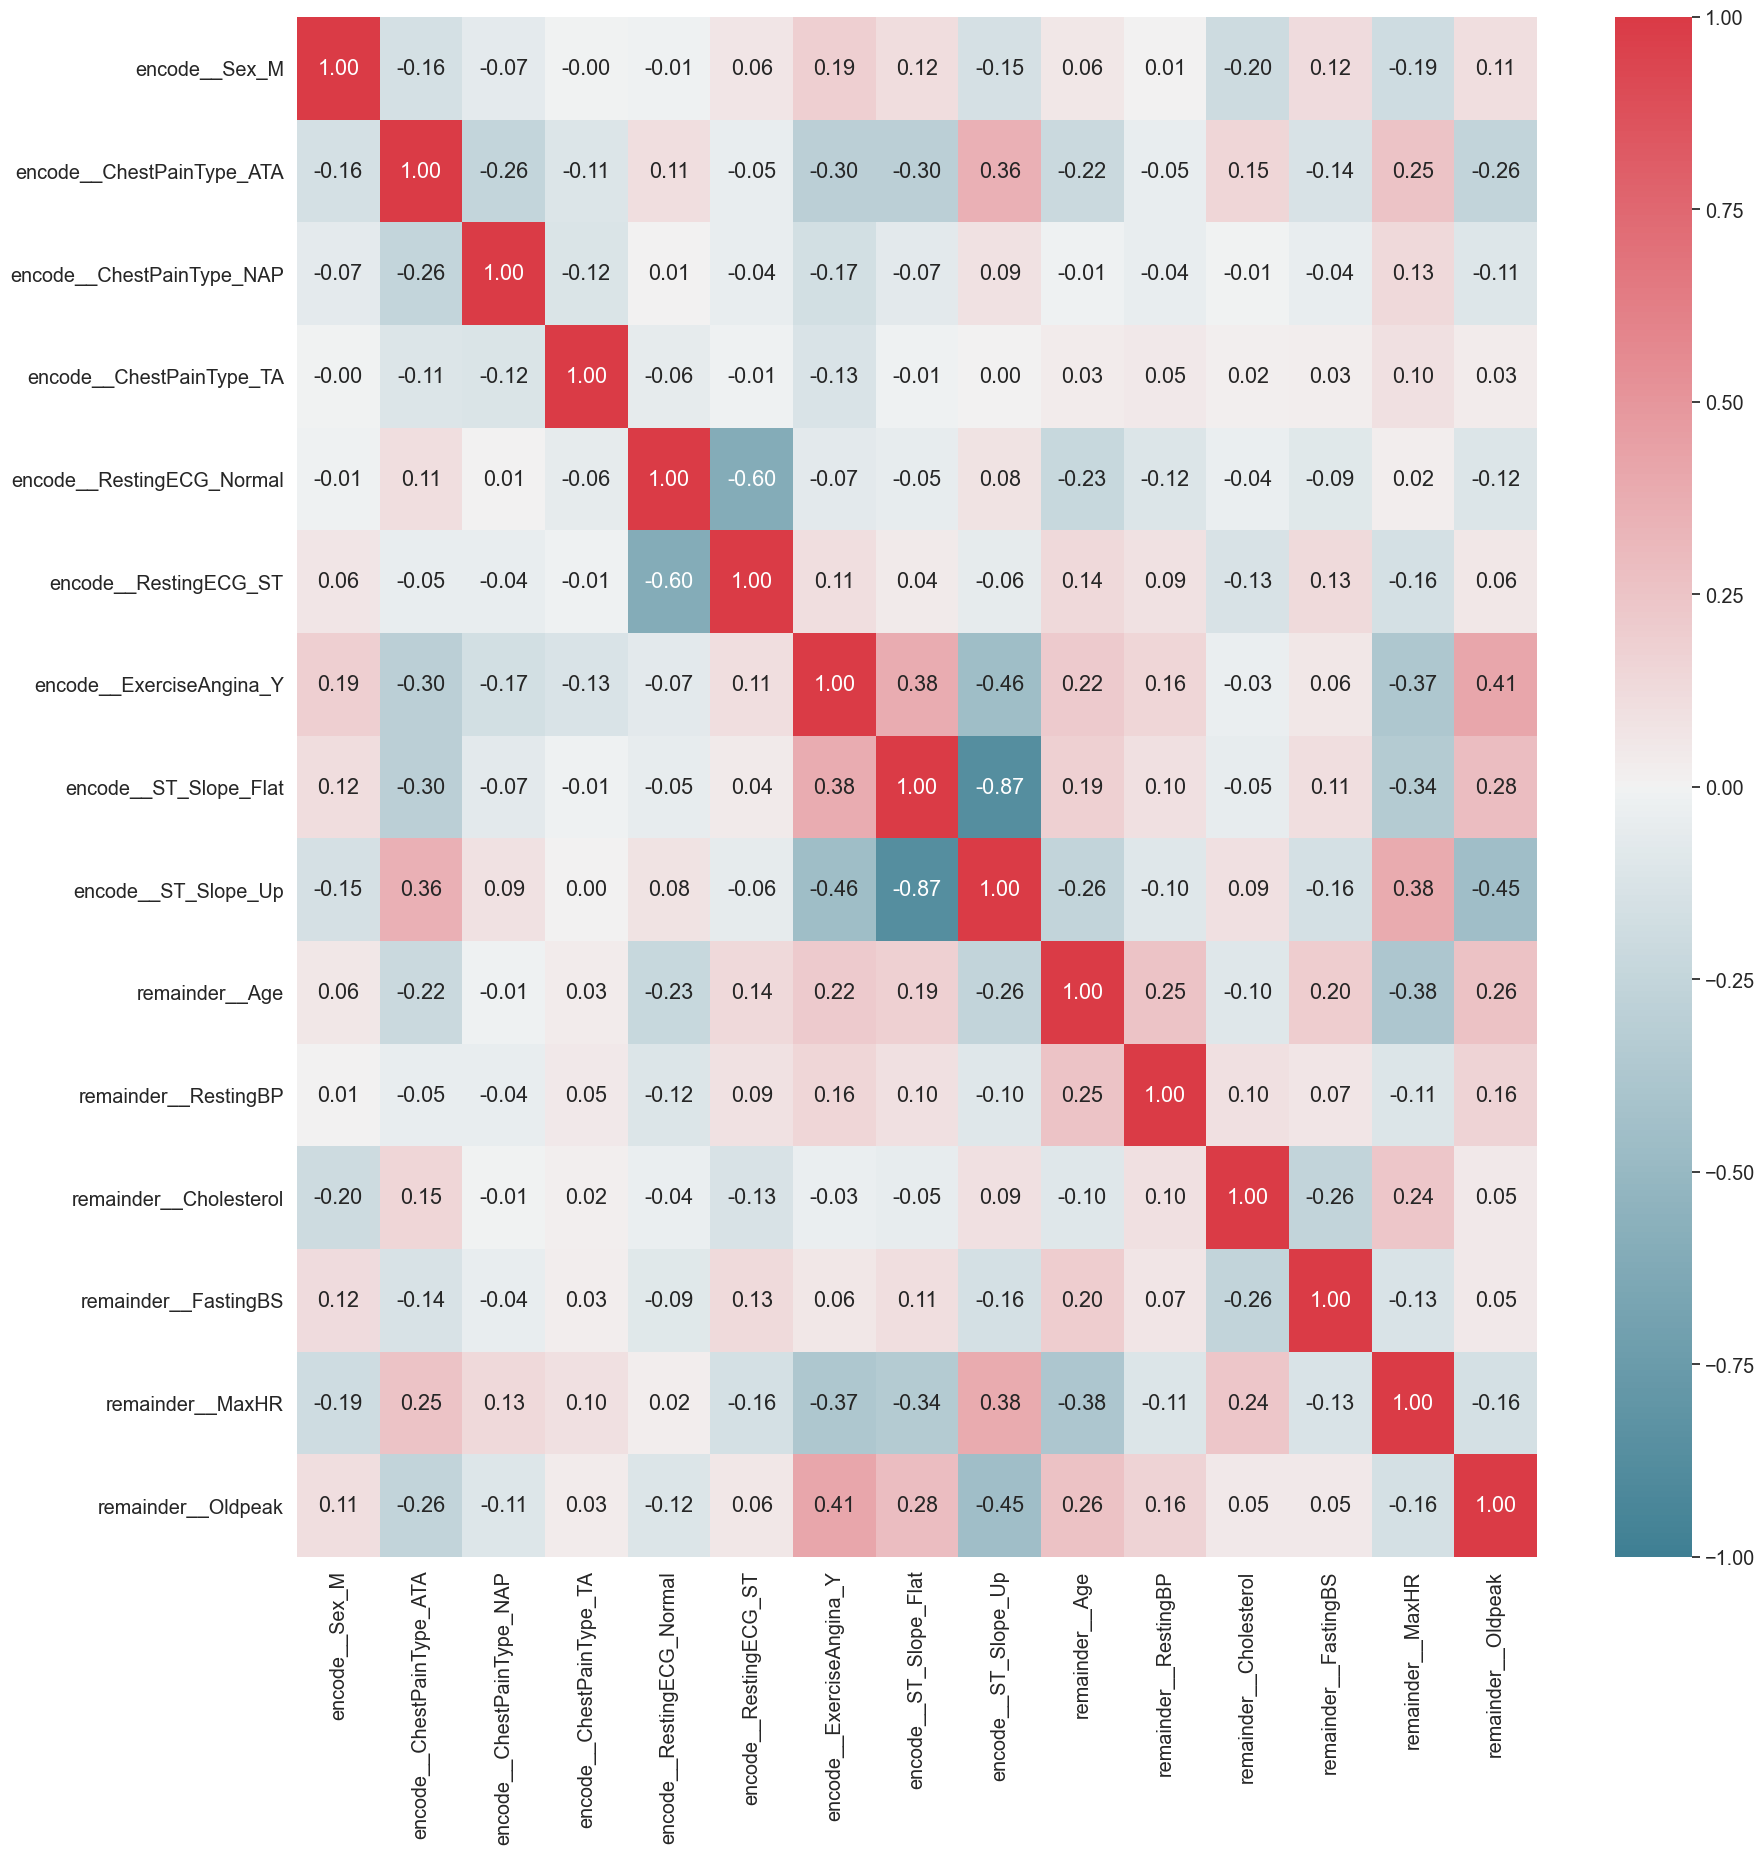

In [43]:
plt.figure(figsize=(20,20))
corr = X.corr()
cmap=sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(corr, annot=True, cmap=cmap,vmin=-1,vmax=1, center=0, 
fmt='.2f')
plt.show()

Dropping columns. threshold for dropping is less than 80% of variance explained

In [44]:
corr_matrix = X.corr().abs()
corr_matrix

encode__Sex_M  encode__ChestPainType_ATA  \
encode__Sex_M                   1.000000                   0.161522   
encode__ChestPainType_ATA       0.161522                   1.000000   
encode__ChestPainType_NAP       0.066486                   0.256767   
encode__ChestPainType_TA        0.004031                   0.110679   
encode__RestingECG_Normal       0.010634                   0.107941   
encode__RestingECG_ST           0.063715                   0.046111   
encode__ExerciseAngina_Y        0.190664                   0.300365   
encode__ST_Slope_Flat           0.116077                   0.304667   
encode__ST_Slope_Up             0.150942                   0.357588   
remainder__Age                  0.055750                   0.218165   
remainder__RestingBP            0.005133                   0.046153   
remainder__Cholesterol          0.200092                   0.150954   
remainder__FastingBS            0.120076                   0.140514   
remainder__MaxHR                0.189186                   0.253735   
remainder__Oldpeak              0.105734                   0.262124   

                           encode__ChestPainType_NAP  \
encode__Sex_M                               0.066486   
encode__ChestPainType_ATA                   0.256767   
encode__ChestPainType_NAP                   1.000000   
encode__ChestPainType_TA                    0.122381   
encode__RestingECG_Normal                   0.005010   
encode__RestingECG_ST                       0.042236   
encode__ExerciseAngina_Y                    0.166030   
encode__ST_Slope_Flat                       0.072031   
encode__ST_Slope_Up                         0.093583   
remainder__Age                              0.011335   
remainder__RestingBP                        0.041348   
remainder__Cholesterol                      0.006634   
remainder__FastingBS                        0.039249   
remainder__MaxHR                            0.134580   
remainder__Oldpeak                          0.106212   

                           encode__ChestPainType_TA  \
encode__Sex_M                              0.004031   
encode__ChestPainType_ATA                  0.110679   
encode__ChestPainType_NAP                  0.122381   
encode__ChestPainType_TA                   1.000000   
encode__RestingECG_Normal                  0.057719   
encode__RestingECG_ST                      0.011611   
encode__ExerciseAngina_Y                   0.128105   
encode__ST_Slope_Flat                      0.010486   
encode__ST_Slope_Up                        0.002087   
remainder__Age                             0.032042   
remainder__RestingBP                       0.049855   
remainder__Cholesterol                     0.017365   
remainder__FastingBS                       0.026885   
remainder__MaxHR                           0.100025   
remainder__Oldpeak                         0.032231   

                           encode__RestingECG_Normal  encode__RestingECG_ST  \
encode__Sex_M                               0.010634               0.063715   
encode__ChestPainType_ATA                   0.107941               0.046111   
encode__ChestPainType_NAP                   0.005010               0.042236   
encode__ChestPainType_TA                    0.057719               0.011611   
encode__RestingECG_Normal                   1.000000               0.602314   
encode__RestingECG_ST                       0.602314               1.000000   
encode__ExerciseAngina_Y                    0.072924               0.107036   
encode__ST_Slope_Flat                       0.047172               0.043017   
encode__ST_Slope_Up                         0.078563               0.058936   
remainder__Age                              0.230566               0.136798   
remainder__RestingBP                        0.116851               0.090447   
remainder__Cholesterol                      0.038470               0.133106   
remainder__FastingBS                        0.093028               0.127110   
remain

In [45]:
corr_matrix = X.corr().abs()
corr_matrix

encode__Sex_M  encode__ChestPainType_ATA  \
encode__Sex_M                   1.000000                   0.161522   
encode__ChestPainType_ATA       0.161522                   1.000000   
encode__ChestPainType_NAP       0.066486                   0.256767   
encode__ChestPainType_TA        0.004031                   0.110679   
encode__RestingECG_Normal       0.010634                   0.107941   
encode__RestingECG_ST           0.063715                   0.046111   
encode__ExerciseAngina_Y        0.190664                   0.300365   
encode__ST_Slope_Flat           0.116077                   0.304667   
encode__ST_Slope_Up             0.150942                   0.357588   
remainder__Age                  0.055750                   0.218165   
remainder__RestingBP            0.005133                   0.046153   
remainder__Cholesterol          0.200092                   0.150954   
remainder__FastingBS            0.120076                   0.140514   
remainder__MaxHR                0.189186                   0.253735   
remainder__Oldpeak              0.105734                   0.262124   

                           encode__ChestPainType_NAP  \
encode__Sex_M                               0.066486   
encode__ChestPainType_ATA                   0.256767   
encode__ChestPainType_NAP                   1.000000   
encode__ChestPainType_TA                    0.122381   
encode__RestingECG_Normal                   0.005010   
encode__RestingECG_ST                       0.042236   
encode__ExerciseAngina_Y                    0.166030   
encode__ST_Slope_Flat                       0.072031   
encode__ST_Slope_Up                         0.093583   
remainder__Age                              0.011335   
remainder__RestingBP                        0.041348   
remainder__Cholesterol                      0.006634   
remainder__FastingBS                        0.039249   
remainder__MaxHR                            0.134580   
remainder__Oldpeak                          0.106212   

                           encode__ChestPainType_TA  \
encode__Sex_M                              0.004031   
encode__ChestPainType_ATA                  0.110679   
encode__ChestPainType_NAP                  0.122381   
encode__ChestPainType_TA                   1.000000   
encode__RestingECG_Normal                  0.057719   
encode__RestingECG_ST                      0.011611   
encode__ExerciseAngina_Y                   0.128105   
encode__ST_Slope_Flat                      0.010486   
encode__ST_Slope_Up                        0.002087   
remainder__Age                             0.032042   
remainder__RestingBP                       0.049855   
remainder__Cholesterol                     0.017365   
remainder__FastingBS                       0.026885   
remainder__MaxHR                           0.100025   
remainder__Oldpeak                         0.032231   

                           encode__RestingECG_Normal  encode__RestingECG_ST  \
encode__Sex_M                               0.010634               0.063715   
encode__ChestPainType_ATA                   0.107941               0.046111   
encode__ChestPainType_NAP                   0.005010               0.042236   
encode__ChestPainType_TA                    0.057719               0.011611   
encode__RestingECG_Normal                   1.000000               0.602314   
encode__RestingECG_ST                       0.602314               1.000000   
encode__ExerciseAngina_Y                    0.072924               0.107036   
encode__ST_Slope_Flat                       0.047172               0.043017   
encode__ST_Slope_Up                         0.078563               0.058936   
remainder__Age                              0.230566               0.136798   
remainder__RestingBP                        0.116851               0.090447   
remainder__Cholesterol                      0.038470               0.133106   
remainder__FastingBS                        0.093028               0.127110   
remain

In [46]:
corr_matrix=X.corr().abs()

In [47]:
mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
tri_df = corr_matrix.mask(mask)
to_drop = [x for x in tri_df.columns if any (tri_df[x]>0.80)]
X = X.drop(to_drop, axis=1)

In [48]:
X

encode__Sex_M  encode__ChestPainType_ATA  encode__ChestPainType_NAP  \
0              1.0                        1.0                        0.0   
1              0.0                        0.0                        1.0   
2              1.0                        1.0                        0.0   
3              0.0                        0.0                        0.0   
4              1.0                        0.0                        1.0   
..             ...                        ...                        ...   
913            1.0                        0.0                        0.0   
914            1.0                        0.0                        0.0   
915            1.0                        0.0                        0.0   
916            0.0                        1.0                        0.0   
917            1.0                        0.0                        1.0   

     encode__ChestPainType_TA  encode__RestingECG_Normal  \
0                         0.0                        1.0   
1                         0.0                        1.0   
2                         0.0                        0.0   
3                         0.0                        1.0   
4                         0.0                        1.0   
..                        ...                        ...   
913                       1.0                        1.0   
914                       0.0                        1.0   
915                       0.0                        1.0   
916                       0.0                        0.0   
917                       0.0                        1.0   

     encode__RestingECG_ST  encode__ExerciseAngina_Y  encode__ST_Slope_Up  \
0                      0.0                       0.0                  1.0   
1                      0.0                       0.0                  0.0   
2                      1.0                       0.0                  1.0   
3                      0.0                       1.0                  0.0   
4                      0.0                       0.0                  1.0   
..                     ...                       ...                  ...   
913                    0.0                       0.0                  0.0   
914                    0.0                       0.0                  0.0   
915                    0.0                       1.0                  0.0   
916                    0.0                       0.0                  0.0   
917                    0.0                       0.0                  1.0   

     remainder__Age  remainder__RestingBP  remainder__Cholesterol  \
0              40.0                 140.0                   289.0   
1              49.0                 160.0                   180.0   
2              37.0                 130.0                   283.0   
3              48.0                 138.0                   214.0   
4              54.0                 150.0                   195.0   
..              ...                   ...                     ...   
913            45.0                 110.0                   264.0   
914            68.0                 144.0                   193.0   
915            57.0                 130.0                   131.0   
916            57.0                 130.0                   236.0   
917            38.0                 138.0                   175.0   

     remainder__FastingBS  remainder__MaxHR  remainder__Oldpeak  
0                     0.0             172.0                 0.0  
1                     0.0             156.0                 1.0  
2                     0.0              98.0                 0.0  
3                     0.0             108.0                 1.5  
4                     0.0             122.0                 0.0  
..                    ...               ...                 ...  
913                   0.0             132.0                 1.2  
914                   1.0             141.0                 3.4  
915                   0

No columns were dropped. Assuming this was done correctly, then all 14 columns account for 80% of the variance within the dataset.

In [49]:
sc = StandardScaler()
X_standardise = sc.fit_transform(X)
X_standardise

array([[ 0.51595242,  2.07517671, -0.53283777, ..., -0.55134134,
         1.38292822, -0.83243239],
       [-1.93816322, -0.48188667,  1.87674385, ..., -0.55134134,
         0.75415714,  0.10566353],
       [ 0.51595242,  2.07517671, -0.53283777, ..., -0.55134134,
        -1.52513802, -0.83243239],
       ...,
       [ 0.51595242, -0.48188667, -0.53283777, ..., -0.55134134,
        -0.85706875,  0.29328271],
       [-1.93816322,  2.07517671, -0.53283777, ..., -0.55134134,
         1.4615246 , -0.83243239],
       [ 0.51595242, -0.48188667,  1.87674385, ..., -0.55134134,
         1.42222641, -0.83243239]])

In [50]:
pca = PCA(n_components = 10)
result = pca.fit(X_standardise)
pca_results = result.transform(X_standardise)
pca_df = pd.DataFrame(data = pca_results)
pca_df

0         1         2         3         4         5         6  \
0   -3.004720 -0.096738 -0.639839 -1.350987 -0.137029 -0.024306 -1.293640   
1   -0.822368 -0.489525 -0.684413  2.299408  0.066305 -1.259648  0.478665   
2   -1.212976  2.273013  0.056191 -1.965154 -1.473587  0.640685 -0.700404   
3    0.718372 -1.418419 -1.271577 -0.031420 -0.511848 -0.374746  1.559687   
4   -0.918133 -0.401106  0.808324  1.505554 -0.168745 -1.259074 -1.535135   
..        ...       ...       ...       ...       ...       ...       ...   
913 -0.479752 -0.873673 -0.407353 -0.035617  3.615438  2.460752  0.432821   
914  1.812820 -0.838423 -0.215488 -0.000407  1.327028 -0.977948  0.169697   
915  1.367535 -1.620672  0.065547 -0.506716 -0.332366  0.150039  0.003981   
916 -1.706948  1.216305 -1.336125 -0.568112 -0.227978 -0.599314  1.603738   
917 -2.326685 -0.450525  0.940725  1.685700 -0.152700  0.329110 -1.524316   

            7         8         9  
0    0.659778  0.072523  0.088578  
1    0.312850  1.638295  0.746324  
2   -0.816878  0.274014 -0.861573  
3   -0.457425  1.524755 -0.349025  
4   -0.917700  0.154931 -0.085417  
..        ...       ...       ...  
913 -1.483168 -0.108227 -0.639904  
914  1.754407 -1.327956  1.134597  
915 -0.685503  0.223951  0.125549  
916  0.316260 -0.294140  0.549810  
917  0.412887  0.900472  0.213452  

[918 rows x 10 columns]

In [51]:
feature_importance = pd.DataFrame(pca.components_.T, index=X.columns)
feature_importance

0         1         2         3         4  \
encode__Sex_M              0.196731 -0.127015  0.287587 -0.189081  0.021597   
encode__ChestPainType_ATA -0.316108  0.127284 -0.143536 -0.524292 -0.138921   
encode__ChestPainType_NAP -0.075185  0.014213  0.215464  0.769777 -0.169913   
encode__ChestPainType_TA  -0.001113  0.112463 -0.092705  0.026062  0.823181   
encode__RestingECG_Normal -0.192855 -0.639577  0.083821 -0.082071  0.103174   
encode__RestingECG_ST      0.202269  0.610435  0.088026 -0.087069 -0.218317   
encode__ExerciseAngina_Y   0.387306 -0.206996 -0.187717 -0.091874 -0.239252   
encode__ST_Slope_Up       -0.407269  0.220556  0.100456 -0.035141  0.000072   
remainder__Age             0.340826  0.121219 -0.050015  0.080722  0.118857   
remainder__RestingBP       0.174082  0.139703 -0.335489  0.020736  0.164025   
remainder__Cholesterol    -0.150191  0.025586 -0.626282  0.140416 -0.072276   
remainder__FastingBS       0.198387  0.108543  0.365709 -0.089170  0.292449   
remainder__MaxHR          -0.371567  0.125530 -0.142012  0.177766  0.155131   
remainder__Oldpeak         0.339553 -0.138671 -0.346951  0.076966  0.048395   

                                  5         6         7         8         9  
encode__Sex_M              0.310694 -0.770630  0.032509 -0.350126 -0.016825  
encode__ChestPainType_ATA -0.192782  0.010009  0.105381 -0.162992  0.239742  
encode__ChestPainType_NAP -0.106241 -0.143172  0.028154 -0.019572  0.069583  
encode__ChestPainType_TA   0.266024  0.025664 -0.296403  0.086061 -0.064918  
encode__RestingECG_Normal -0.211703 -0.020329 -0.016959  0.118863  0.030324  
encode__RestingECG_ST      0.192709  0.006850 -0.049666  0.190631  0.001100  
encode__ExerciseAngina_Y   0.137700 -0.027111  0.059355  0.249693 -0.184106  
encode__ST_Slope_Up       -0.148463 -0.239679 -0.108429 -0.070984  0.067205  
remainder__Age            -0.459305  0.088634 -0.254098 -0.583132  0.194380  
remainder__RestingBP      -0.531274 -0.515575  0.086498  0.469937  0.069912  
remainder__Cholesterol     0.045715 -0.102364  0.104463 -0.369736 -0.582979  
remainder__FastingBS      -0.257646  0.161272  0.690043 -0.093938 -0.328759  
remainder__MaxHR           0.235752 -0.095716  0.486250 -0.003500  0.283130  
remainder__Oldpeak         0.209828  0.083125  0.292570 -0.137027  0.568394

In [52]:
print(pca.explained_variance_ratio_)
total_var = pca.explained_variance_ratio_.sum()*100
total_var

[0.21167983 0.11194236 0.1007103  0.08773937 0.08001739 0.07361045
 0.0613719  0.05863486 0.04791395 0.04461334]


87.82337356219021

Experiments with different component amounts:
5 components account for 59% of variance
10 components account for 88% of variance

I am going to continue and remove 4 dimensions

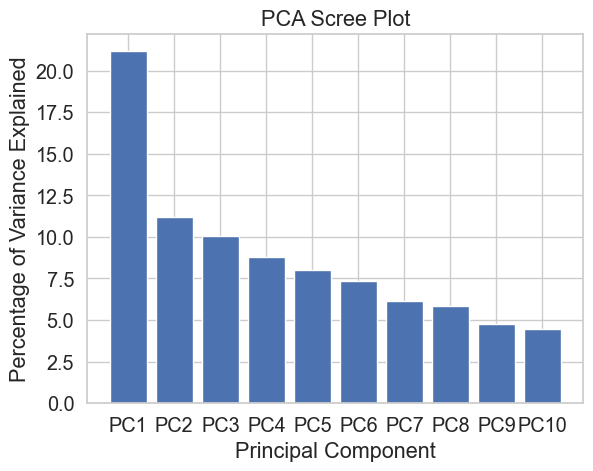

In [53]:
percent_variance = np.round(pca.explained_variance_ratio_*100, decimals=2)
columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']
plt.bar(x=range(1,11), height = percent_variance, tick_label=columns)
plt.ylabel('Percentage of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

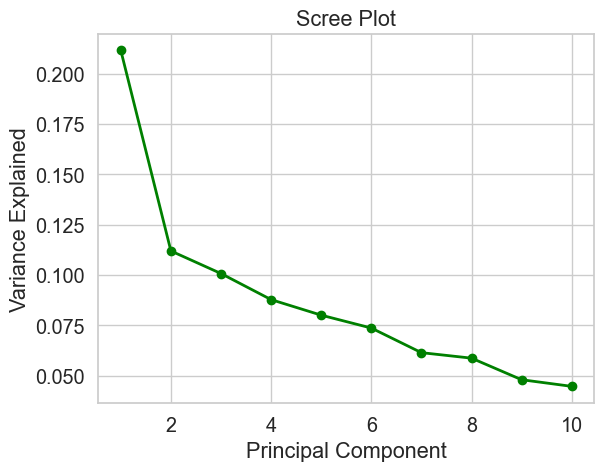

In [54]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_,'o-', linewidth=2, color='green')
plt.title("Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.show()

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [56]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [57]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [58]:
y_pred = knn.predict(X_test)
print("Test Set Predictions:{}".format(y_pred))

Test Set Predictions:[1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1.
 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0.
 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1.
 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1.
 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1.
 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1.
 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0.
 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1.]


In [59]:
knn.score(X_test, y_test)

0.7101449275362319

In [60]:
cv_results = cross_val_score(knn, X, y, cv=6)
print(cv_results)

[0.64705882 0.79738562 0.75816993 0.65359477 0.65359477 0.60130719]


In [61]:
print("the average accuracy rate is: {}".format(np.mean(cv_results)))

the average accuracy rate is: 0.6851851851851851


In [62]:
param_grid = {"n_neighbors":np.arange(1, 50)}
knn = KNeighborsClassifier()
knn_best = GridSearchCV(knn, param_grid, cv=6)
knn_best.fit(X, y)

GridSearchCV(cv=6, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [63]:
knn_best.best_params_
print("best parameter:", knn_best.best_params_)

best parameter: {'n_neighbors': 28}


In [64]:
knn_best.best_score_
print("best score:", knn_best.best_score_)

best score: 0.7091503267973854


Interestingly, the results from the hyperparameter tuning suggest the same 'n' and nearly the same best score.
In the initial model, I used n=29 instead of 28, in order to avoid ties in future uses of the model. I will do the same here as well.

In [65]:
y_pred = knn_best.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.64      0.72      0.68       118
         1.0       0.77      0.70      0.74       158

    accuracy                           0.71       276
   macro avg       0.71      0.71      0.71       276
weighted avg       0.72      0.71      0.71       276



In [66]:
knn = KNeighborsClassifier(n_neighbors = 29)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[ 83  35]
 [ 49 109]]


Confusion Matrix:
 [[ 83  35]
 [ 49 109]] 

True Positive: 109
False Positive: 35
True Negative: 83
False Negative: 49
Correct predictions: 69.6 %


<Axes: >

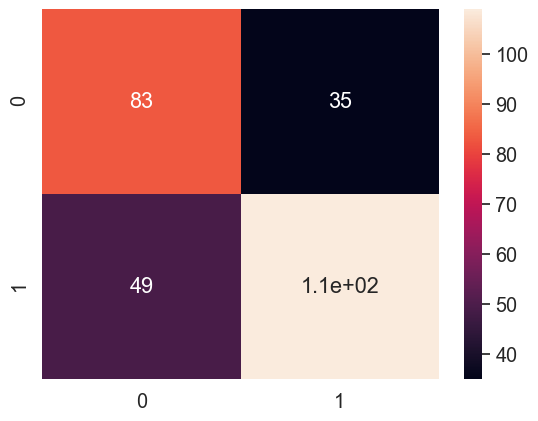

In [67]:
cm=confusion_matrix(y_test,y_pred)
true_positive=cm[1][1]
false_positive=cm[0][1]
true_negative=cm[0][0]
false_negative=cm[1][0]
print("Confusion Matrix:\n", cm, "\n")
print("True Positive:",true_positive )
print("False Positive:",false_positive )
print("True Negative:",true_negative )
print("False Negative:",false_negative )
print("Correct predictions:",round((true_positive + 
true_negative)/len(y_pred)*100,1),'%' )
#print(cm)
sns.heatmap(cm, annot=True)

The PCA did NOT improve the performance of the model. Performance decreased after removing 4 components. The model prior to conduting PCA is the superior model.

# Random Forest Classifier

In [68]:
rfc = RandomForestClassifier(n_estimators = 25, criterion='entropy', random_state=42)
rfc

RandomForestClassifier(criterion='entropy', n_estimators=25, random_state=42)

In [69]:
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=25, random_state=42)

In [70]:
y_pred = rfc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.85      0.83       118
         1.0       0.88      0.85      0.86       158

    accuracy                           0.85       276
   macro avg       0.84      0.85      0.85       276
weighted avg       0.85      0.85      0.85       276



In [71]:
scores = cross_val_score(rfc, X_train, y_train, scoring = 'accuracy', cv = 15).mean()
print("The mean accuracy with 15 fold cross validation is %s" % round(scores*100,2))

The mean accuracy with 15 fold cross validation is 86.3


C:\Users\eepag\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

C:\Users\eepag\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



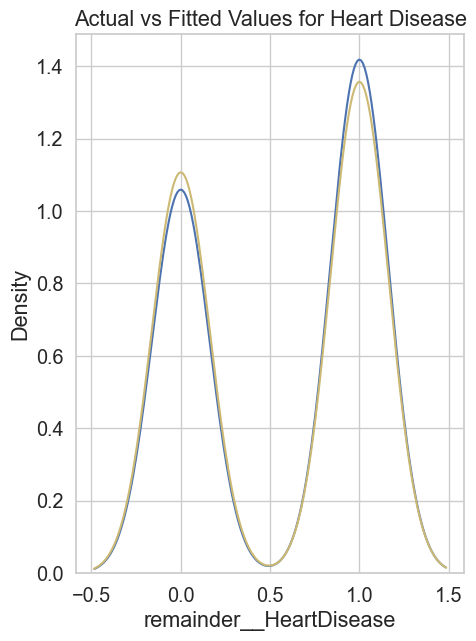

In [72]:
plt.figure(figsize=(5, 7))
ax = sns.distplot(y_test, hist=False, color='b', label='Actual Value')
sns.distplot(y_pred, hist=False, color='y', label='Fitted Values', ax=ax)
plt.title('Actual vs Fitted Values for Heart Disease')
plt.show()
plt.close()

Confusion Matrix:
 [[100  18]
 [ 24 134]] 

True Positive: 134
False Positive: 18
True Negative: 100
False Negative: 24
Correct predictions: 84.8 %
[[100  18]
 [ 24 134]]


<Axes: >

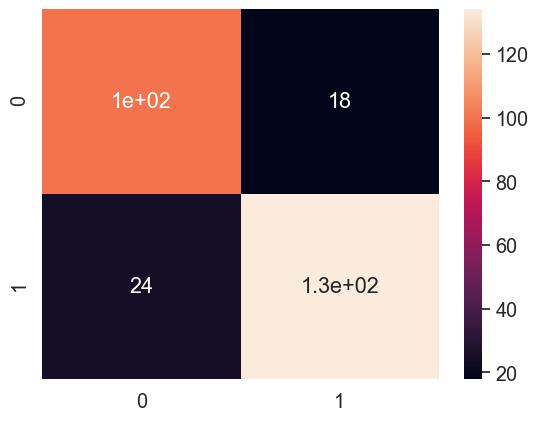

In [73]:
cm = confusion_matrix(y_test, y_pred)
true_positive=cm[1][1]
false_positive=cm[0][1]
true_negative=cm[0][0]
false_negative=cm[1][0]

print("Confusion Matrix:\n", cm, "\n")
print("True Positive:", true_positive)
print("False Positive:", false_positive)
print("True Negative:", true_negative)
print("False Negative:", false_negative)
print("Correct predictions:", round((true_positive + true_negative)/len(y_pred)*100,1),'%')
print(cm)
sns.heatmap(cm, annot=True)

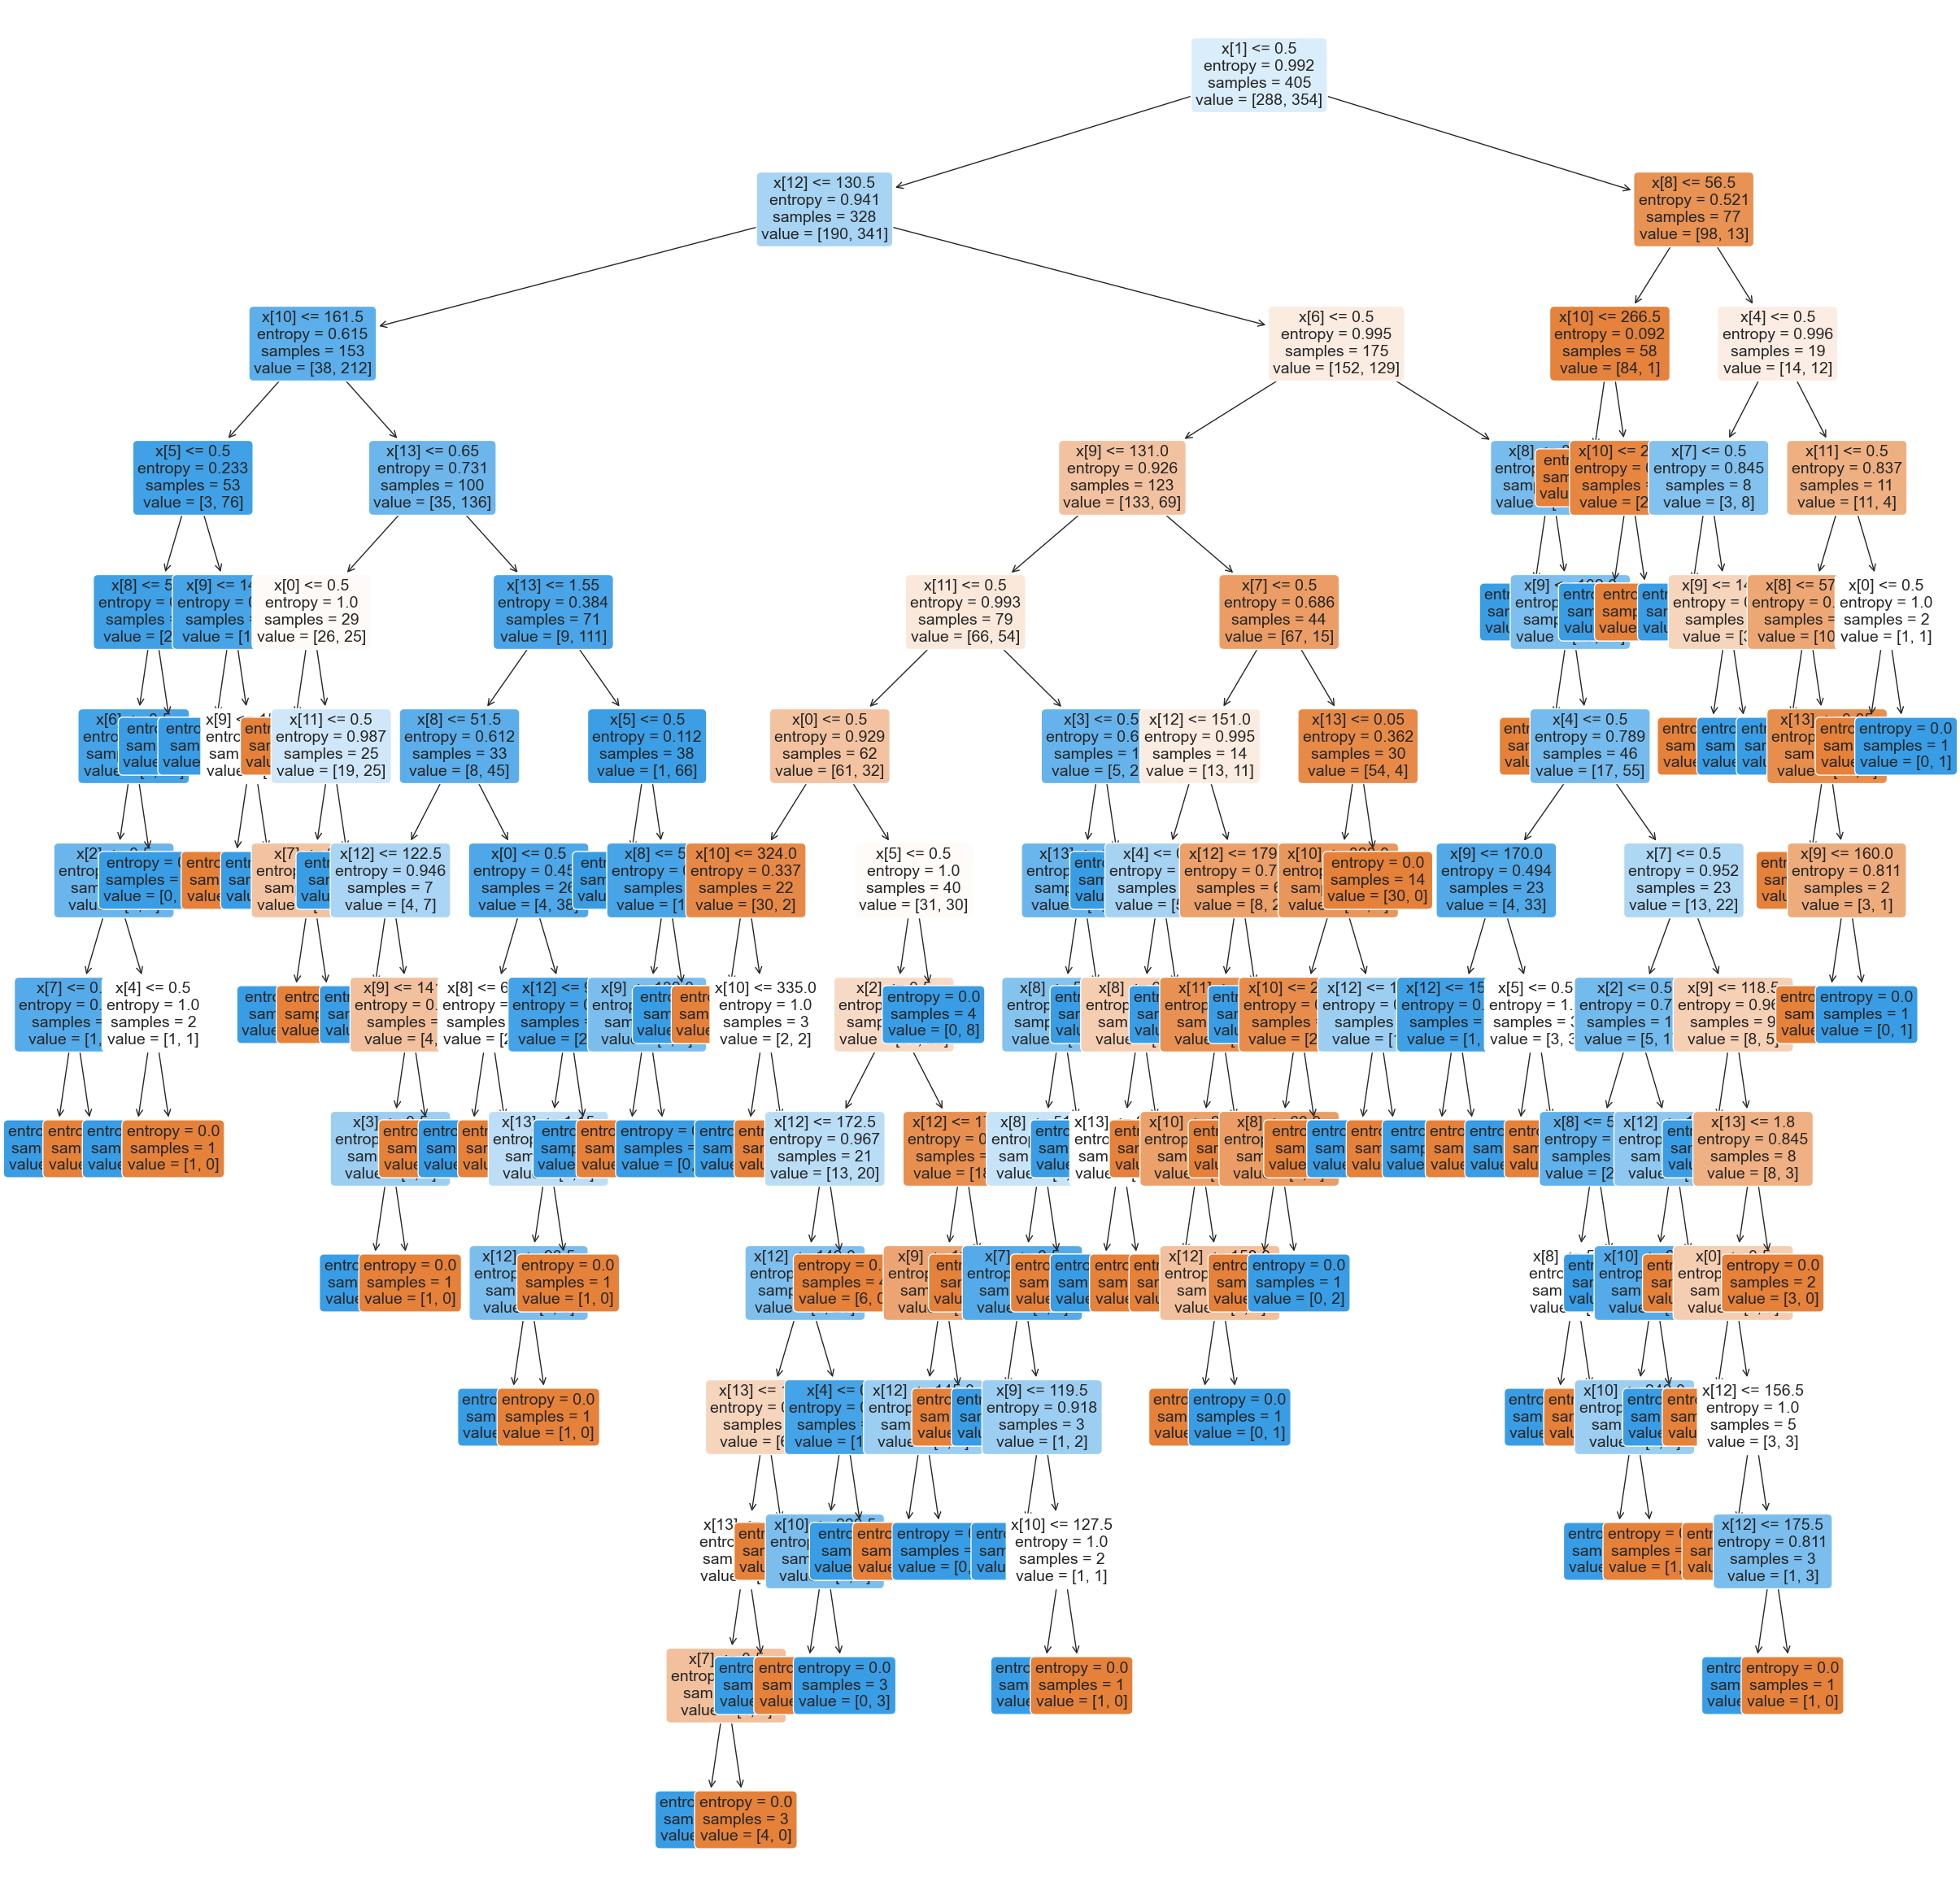

In [74]:
Tree = rfc.estimators_[4]
plt.figure(figsize=(30, 30))
tree.plot_tree(Tree, filled=True, rounded=True, fontsize=14);

Hyperparameter Tuning using Randomized Search CV

In [75]:
param_dist = {'n_estimators': randint(100, 1000),
             'max_depth': randint(3, 50),
             'criterion': ['entropy', 'gini']}
rf = RandomForestClassifier()

rand_search = RandomizedSearchCV(rf, param_distributions = param_dist,
                                 n_iter=10,
                                 cv = 8)
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=8, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001A349FB4520>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001A34B800160>})

In [76]:
best_rf = rand_search.best_estimator_
print('Best hyperparameters:', rand_search.best_params_)

Best hyperparameters: {'criterion': 'gini', 'max_depth': 6, 'n_estimators': 462}


In [77]:
best_rf = RandomForestClassifier(max_depth = 22, n_estimators = 106, criterion = 'gini', random_state=42)
best_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=22, n_estimators=106, random_state=42)

In [78]:
y_pred = best_rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.88      0.86       118
         1.0       0.91      0.87      0.89       158

    accuracy                           0.88       276
   macro avg       0.87      0.88      0.87       276
weighted avg       0.88      0.88      0.88       276



In [79]:
scores = cross_val_score(best_rf, X_train, y_train, scoring='accuracy', cv=15).mean()
print("The mean accuracy with 10 fold cross validation is %s" % round(scores*100,2))

The mean accuracy with 10 fold cross validation is 86.61


C:\Users\eepag\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

C:\Users\eepag\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



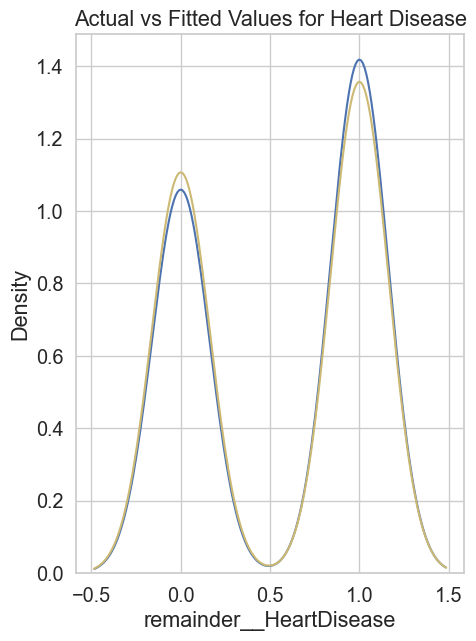

In [80]:
plt.figure(figsize=(5, 7))
ax = sns.distplot(y_test, hist=False, color='b', label='Actual Value')
sns.distplot(y_pred, hist=False, color='y', label='Fitted Values', ax=ax)
plt.title('Actual vs Fitted Values for Heart Disease')
plt.show()
plt.close()

There was a 1% increase in the performance of the model with the hyperparameters used. Further search with more iterations and more folds may help find better hyperparameters.

Confusion Matrix:
 [[104  14]
 [ 20 138]] 

True Positive: 138
False Positive: 14
True Negative: 104
False Negative: 20
Correct predictions: 87.7 %
[[104  14]
 [ 20 138]]


<Axes: >

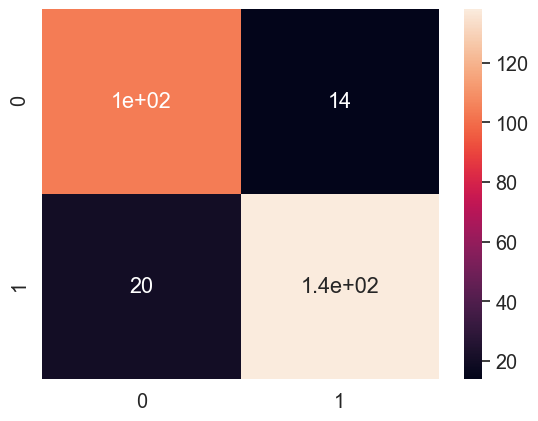

In [81]:
cm = confusion_matrix(y_test, y_pred)
true_positive=cm[1][1]
false_positive=cm[0][1]
true_negative=cm[0][0]
false_negative=cm[1][0]

print("Confusion Matrix:\n", cm, "\n")
print("True Positive:", true_positive)
print("False Positive:", false_positive)
print("True Negative:", true_negative)
print("False Negative:", false_negative)
print("Correct predictions:", round((true_positive + true_negative)/len(y_pred)*100,1),'%')
print(cm)
sns.heatmap(cm, annot=True)

# Thought
The dataset is small, therefore it is challenging to make inferences about larger populations. The creation of new dataframes to examine specific populations answers further questions. The above models and EDA revealed information about a general about a population but left me asking questions about specific groups. The correlation matrix and PCA did not indicate any significantly strong relationships, but what about on specific sexes, specific ages? What about men age 50 +? People are having indicidences of heart disease at younger ages - are there any of indicators that, when applied to only young people, have stronger relationships with age? This will allow for predicting instances of heart disease in younger people.